# Experiment 4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salary = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


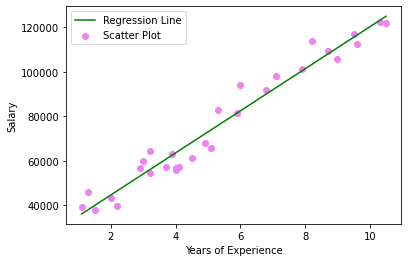

In [3]:
#data visualization plus predicting values
x = salary['YearsExperience'] # independent variable (years of experience)
y = salary['Salary'] # dependent variable (salary)
meanX = np.mean(x)
meanY = np.mean(y)
n = len(x)
num = 0 
den = 0
for i in range(n):
    num = num + ((x[i]-meanX)*(y[i]-meanY)) 
    den = den + (x[i]-meanX)**2
b1 = num/den # slope
b0 = meanY - (b1*meanX) # intercept
maxX = np.max(x) 
minX = np.min(x) 
x1 = np.linspace(minX,maxX,30)
y1 = b0 + b1*x1
#plt.rcParams['figure.figsize']=(20.0,10.0)
'''
plt.plot(x1,y1,color='Violet',label='Regression Line')
plt.scatter(x,y,c='Green',label='Scatter Plot')
'''
plt.plot(x1,y1,color='Green',label='Regression Line')
plt.scatter(x,y,color='Violet',label='Scatter Plot')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [4]:
# slope and intercepts
print('slope',b1)
print('intercepts',b0)
# predicted values
print('predicted values',y1)

slope 9449.962321455077
intercepts 25792.20019866869
predicted values [ 36187.15875227  39250.2499875   42313.34122273  45376.43245796
  48439.52369319  51502.61492842  54565.70616365  57628.79739888
  60691.88863411  63754.97986934  66818.07110457  69881.1623398
  72944.25357503  76007.34481026  79070.43604549  82133.52728072
  85196.61851595  88259.70975118  91322.80098641  94385.89222164
  97448.98345687 100512.0746921  103575.16592734 106638.25716257
 109701.3483978  112764.43963303 115827.53086826 118890.62210349
 121953.71333872 125016.80457395]


In [5]:
# calculation of MSE
error = []
for i in range(n):
    error.append(((y[i]-y1[i])**2))
mse = np.sum(error)/n
print('mean square error',mse)

mean square error 77333376.83746204


In [6]:
# Using Gradient Descent 
# initialize the parameters
a0 = 0
a1 = 0
lr = 0.0001
iterations = 1000
error = []
# calculation of random error
for itr in range(iterations):
    error_cost = 0
    cost_a0 = 0
    cost_a1 = 0
    for i in range(n):
        y_pred = a0 + (a1*x[i])
        error_cost = error_cost + (y[i] - y_pred)
for j in range(n):
    partial_wrt_a0 = -2 *(y[j] - (a0 + a1*x[j])) #partial derivative w.r.t a0
    partial_wrt_a1 = (-2*x[j])*(y[j]-(a0 + a1*x[j])) #partial derivative w.r.t a1
    cost_a0 = cost_a0 + partial_wrt_a0 #calculate cost for each number and add
    cost_a1 = cost_a1 + partial_wrt_a1 #calculate cost for each number and add
    a0 = a0 - lr * cost_a0 #update a0
    a1 = a1 - lr * cost_a1 #update a1
    print(itr,a0,a1) #Check iteration and updated a0 and a1
    error.append(error_cost) #Append the data in array

999 7.868600000000001 8.655460000000001
999 24.974375860400002 29.319248618520003
999 49.612561071042364 61.28165126240356
999 82.92131110896557 110.58518356084878
999 124.1430194039002 177.29722402471913
999 176.5654667050197 276.4914076065257
999 240.81670606823428 411.17196737461745
999 315.6456320311155 579.7011242616423
999 402.929420148063 788.0858400416795
999 500.9872388593501 1036.334469020773
999 610.7801192370291 1330.349838498795
999 730.5453637200617 1664.2546643982312
999 860.2244953988317 2037.815039080617
999 999.4767738464758 2450.625315515387
999 1148.5457941553868 2907.610930325857
999 1308.1232465937474 3416.087862570631
999 1477.160464762967 3972.8096000427863
999 1658.3086726631886 4593.719583089252
999 1849.9772297208324 5276.699626164509
999 2053.731751781135 6032.195459255716
999 2267.219341666493 6853.876153557304
999 2490.175583545467 7742.78427701356
999 2720.66059115005 8691.169649702131
999 2959.1103484108917 9704.865969572022
999 3201.9680168149957 10756.

In [7]:
#At approximate iteration 50- 60, we got the value of a0 and a1.
print(a0)
print(a1)

4396.253896738941
15807.715342096419


Text(0, 0.5, 'Error')

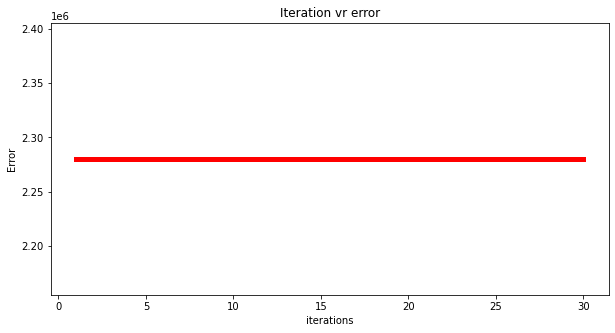

In [8]:
#Plotting the error for each iteration.
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(error)+1),error,color='red',linewidth = 5)
plt.title("Iteration vr error")
plt.xlabel("iterations")
plt.ylabel("Error")

0      21784.740773
1      24946.283841
2      28107.826910
3      36011.684581
4      39173.227649
5      50238.628389
6      51819.399923
7      54980.942991
8      54980.942991
9      62884.800662
10     66046.343731
11     67627.115265
12     67627.115265
13     69207.886799
14     75530.972936
15     81854.059073
16     85015.602141
17     88177.145210
18     97661.774415
19     99242.545949
20    111888.718223
21    116631.032826
22    129277.205099
23    134019.519702
24    141923.377373
25    146665.691976
26    154569.549647
27    156150.321181
28    167215.721920
29    170377.264989
Name: YearsExperience, dtype: float64


Text(0, 0.5, 'salary')

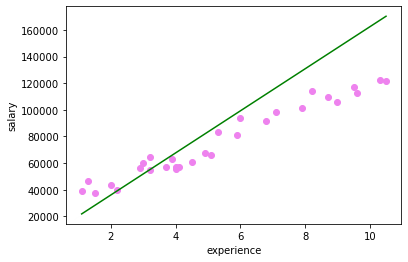

In [9]:
#Predicting the values.
pred = a0+a1*x
print(pred)
plt.scatter(x,y,color = 'violet')
plt.plot(x,pred, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")

In [10]:
#Analyze the performance of the model by calculating the mean squared error.
error1 = salary - pred
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

mean squared error is 0                  0.0
1                  0.0
2                  0.0
3                  0.0
4                  0.0
5                  0.0
6                  0.0
7                  0.0
8                  0.0
9                  0.0
10                 0.0
11                 0.0
12                 0.0
13                 0.0
14                 0.0
15                 0.0
16                 0.0
17                 0.0
18                 0.0
19                 0.0
20                 0.0
21                 0.0
22                 0.0
23                 0.0
24                 0.0
25                 0.0
26                 0.0
27                 0.0
28                 0.0
29                 0.0
Salary             0.0
YearsExperience    0.0
dtype: float64


In [11]:
#Use the scikit library to confirm the above steps.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x = np.array(x).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
salary_pred = model.predict(x)
Mse = mean_squared_error(y, salary_pred)
print('slop', model.coef_)
print("Intercept", model.intercept_)
print("MSE", Mse)

slop [9449.96232146]
Intercept 25792.20019866871
MSE 31270951.722280968
